In [24]:
import json
import pandas as pd

# load baselines: filename!!
with open('results_jsons/baselines_freeze_True_pool_False_lr_0.001.json', 'r') as f:
    baselines = json.load(f)
baselines = baselines[1:]

# load results; filename
with open('results_jsons/results_freeze_True_reinit_False_pool_False_lr_0.001.json', 'r') as f:
    results = json.load(f)
params = results[0]
results = results[1:]

In [26]:
data_dicts = baselines + results 
# Create DataFrame from the list of dictionaries
df = pd.DataFrame(data_dicts)

In [27]:
# Calculate mean, median, and max for train and test accuracies
df['Mean Train Accuracy'] = df.groupby(['lr', 'sampled_percentage', 'sampled_cut_point'])['train_acc'].transform('mean')
df['Median Train Accuracy'] = df.groupby(['lr', 'sampled_percentage', 'sampled_cut_point'])['train_acc'].transform('median')
df['Mean Test Accuracy'] = df.groupby(['lr', 'sampled_percentage', 'sampled_cut_point'])['test_acc'].transform('mean')
df['Median Test Accuracy'] = df.groupby(['lr', 'sampled_percentage', 'sampled_cut_point'])['test_acc'].transform('median')
df['Max Test Accuracy'] = df.groupby(['lr', 'sampled_percentage', 'sampled_cut_point'])['test_acc'].transform('max')
df['Max Train Accuracy'] = df.groupby(['lr', 'sampled_percentage', 'sampled_cut_point'])['train_acc'].transform('max')

# Rename the columns to match the specified names
df.rename(columns={
    'lr': 'learning rate',
    'sampled_percentage': 'Percentage',
    'sampled_cut_point': 'Cut Point',
    'repeat': 'Trial',
    'train_acc': 'Train Accuracy',
    'test_acc': 'Test Accuracy'
}, inplace=True)

# Display the DataFrame (showing the first few rows for brevity)
df.head()


,learning rate,Percentage,Cut Point,Trial,Train Accuracy,Test Accuracy,Mean Train Accuracy,Median Train Accuracy,Mean Test Accuracy,Median Test Accuracy,Max Test Accuracy,Max Train Accuracy
0,0.001,0.001,-1,0,1.0,0.739560,1.0,1.0,0.74857,0.749949,0.790372,1.0
1,0.001,0.001,-1,1,1.0,0.737708,1.0,1.0,0.74857,0.749949,0.790372,1.0
2,0.001,0.001,-1,2,1.0,0.768360,1.0,1.0,0.74857,0.749949,0.790372,1.0
3,0.001,0.001,-1,3,1.0,0.768978,1.0,1.0,0.74857,0.749949,0.790372,1.0
4,0.001,0.001,-1,4,1.0,0.760337,1.0,1.0,0.74857,0.749949,0.790372,1.0


## The plots

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
percentages

array([0.001, 0.002, 0.005, 0.01 , 0.05 , 0.1  , 0.3  , 0.5  , 0.8  ,
       1.   ])

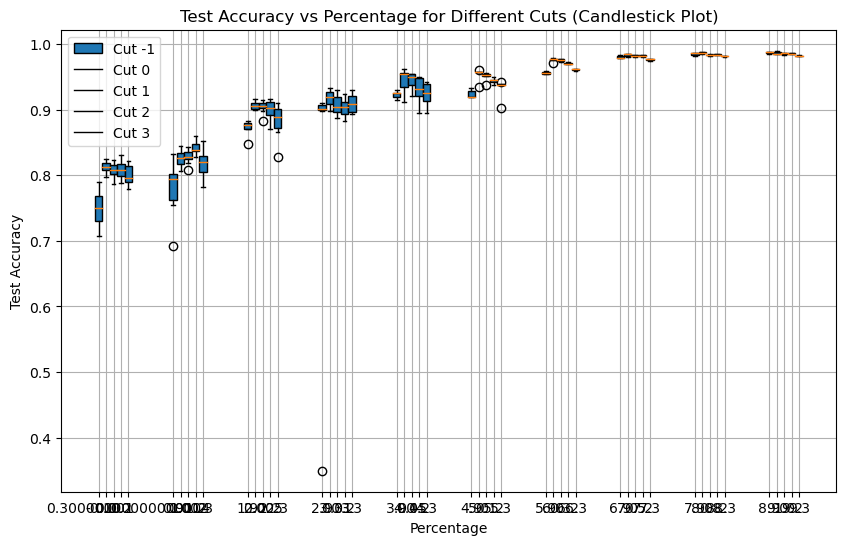

In [35]:
# # Define column names
# columns = ['Percentage', 'Cut Point', 'Trial', 'Train Accuracy', 'Test Accuracy']

# # Create DataFrame
# df = pd.DataFrame(data_tuples, columns=columns)

# # Calculate mean and standard deviation for test accuracies
# df['Mean Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('mean')
# df['Std Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('std')

# Unique percentages and cut points
percentages = df['Percentage'].unique()
cut_points = df['Cut Point'].unique()

# Plotting
plt.figure(figsize=(10, 6))


# Iterate over each unique cut point
for cut_point in cut_points:
    cut_df = df[df['Cut Point'] == cut_point]

    # Create a list of arrays, each containing test accuracies for a given percentage
    data = [cut_df[cut_df['Percentage'] == p]['Test Accuracy'].values for p in percentages]

    # Position for the candle plots for this cut point
    positions = np.array(range(len(percentages))) + cut_point * 0.1  # slight offset for each cut point

    # Create boxplot (candlestick plot)
    plt.boxplot(data, positions=positions, widths=0.1, patch_artist=True, labels=percentages if cut_point == 1 else None)

plt.xlabel('Percentage')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Percentage for Different Cuts (Candlestick Plot)')
plt.legend([f'Cut {cp}' for cp in cut_points])
plt.grid(True)
plt.show()


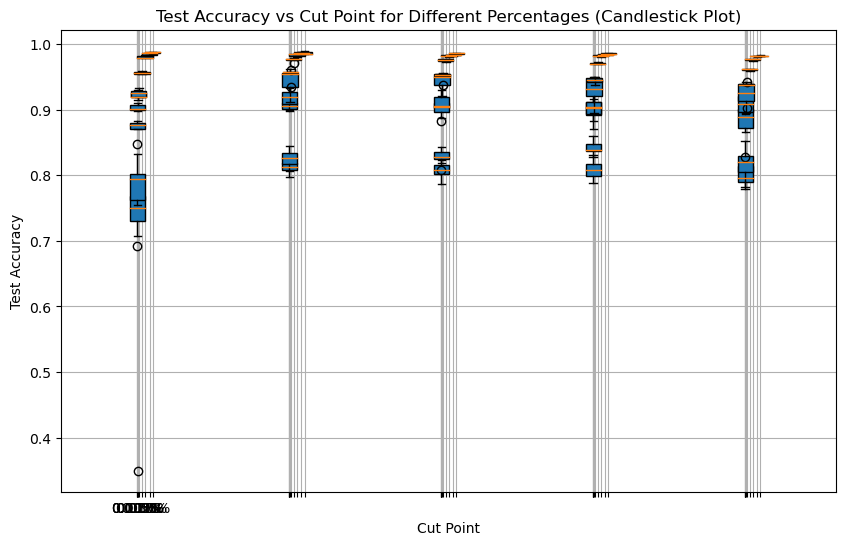

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you already have the DataFrame df

# Unique percentages and cut points
percentages = df['Percentage'].unique()
cut_points = df['Cut Point'].unique()

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over each unique percentage
for percentage in percentages:
    percentage_df = df[df['Percentage'] == percentage]

    # Create a list of arrays, each containing test accuracies for a given cut point
    data = [percentage_df[percentage_df['Cut Point'] == cp]['Test Accuracy'].values for cp in cut_points]

    # Position for the candle plots for this percentage
    positions = np.array(range(len(cut_points))) + percentage * 0.1  # slight offset for each percentage

    # Create boxplot (candlestick plot)
    plt.boxplot(data, positions=positions, widths=0.1, patch_artist=True, labels=[f'{percentage}%' if cp == cut_points[0] else '' for cp in cut_points])

plt.xlabel('Cut Point')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Cut Point for Different Percentages (Candlestick Plot)')
plt.grid(True)
plt.show()


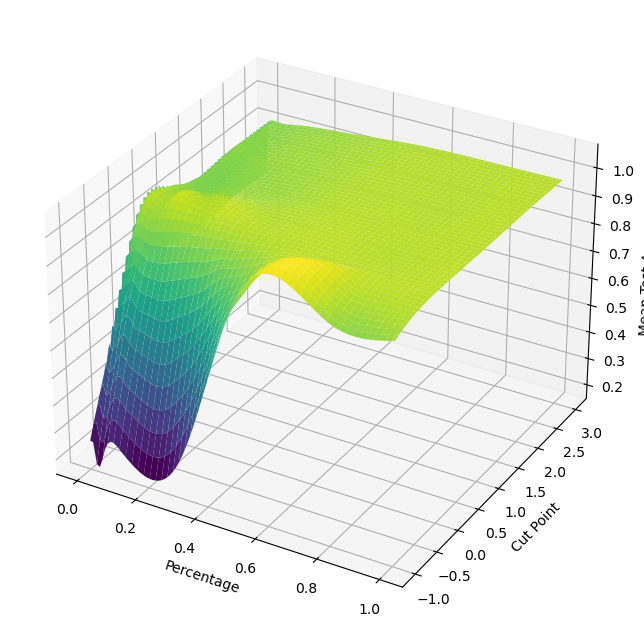

In [16]:
from scipy.interpolate import griddata

# Create grid values
xi = np.linspace(df['Percentage'].min(), df['Percentage'].max(), 100)
yi = np.linspace(df['Cut Point'].min(), df['Cut Point'].max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate
zi = griddata((df['Percentage'], df['Cut Point']), df['Mean Test Accuracy'], (xi, yi), method='cubic')

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xi, yi, zi, cmap='viridis')
ax.set_xlabel('Percentage')
ax.set_ylabel('Cut Point')
ax.set_zlabel('Mean Test Accuracy')
plt.show()

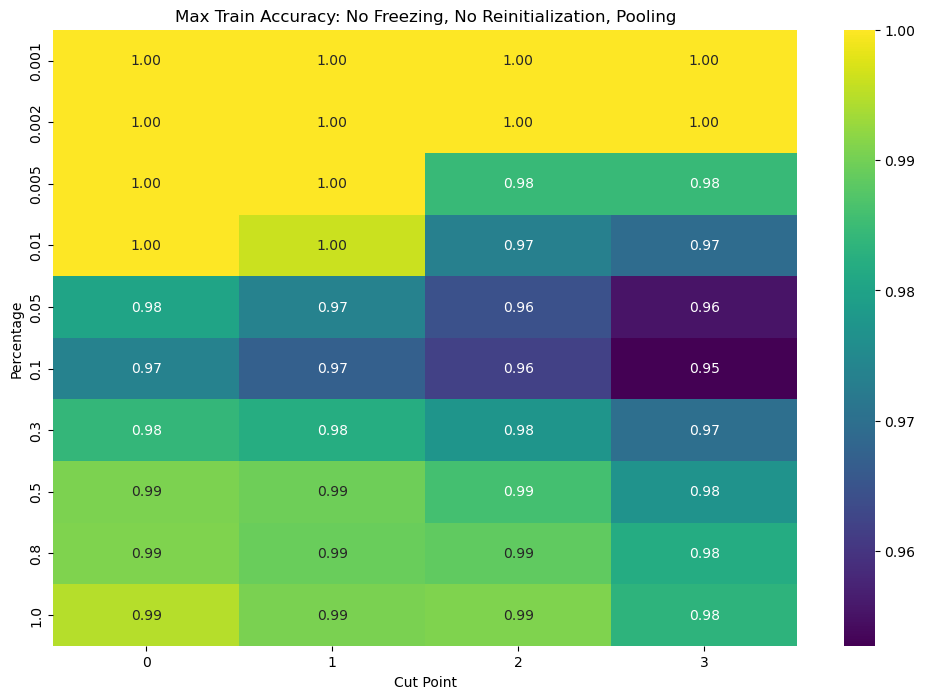

In [16]:
# For the heatmap, we will use the mean test accuracy, aggregated over trials for each combination of 'Percentage' and 'Cut Point'

# We will pivot the dataframe to get the mean test accuracy for each combination of 'Percentage' and 'Cut Point'
heatmap_data = df.pivot_table(index='Percentage', columns='Cut Point', values='Max Train Accuracy', aggfunc='max')

# Generating the heatmap using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title('Max Train Accuracy: No Freezing, No Reinitialization, Pooling')
plt.xlabel('Cut Point')
plt.ylabel('Percentage')
plt.show()


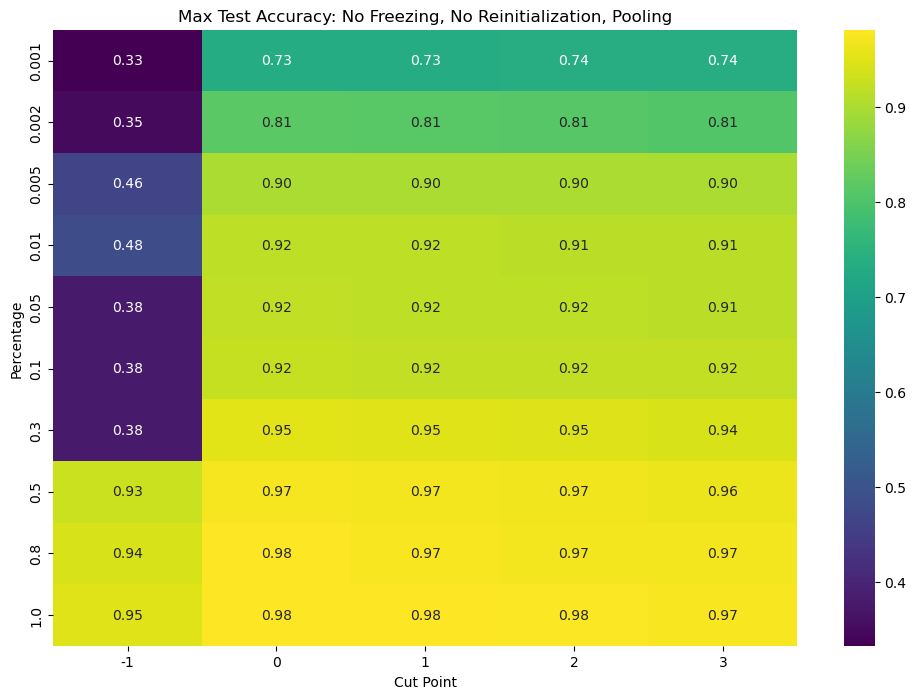

In [18]:
# For the heatmap, we will use the mean test accuracy, aggregated over trials for each combination of 'Percentage' and 'Cut Point'

# We will pivot the dataframe to get the mean test accuracy for each combination of 'Percentage' and 'Cut Point'
heatmap_data = df.pivot_table(index='Percentage', columns='Cut Point', values='Max Test Accuracy', aggfunc='max')

# Generating the heatmap using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title('Max Test Accuracy: No Freezing, No Reinitialization, Pooling')
plt.xlabel('Cut Point')
plt.ylabel('Percentage')
plt.show()


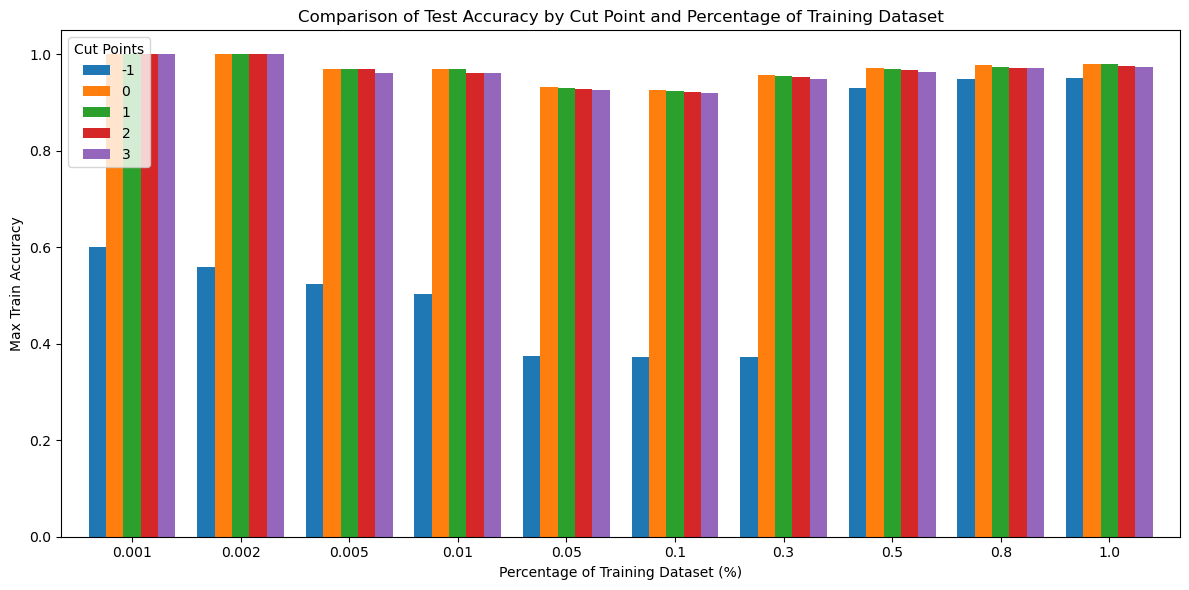

In [19]:
# Create a bar graph for comparing the test accuracies of different cut points at each percentage level.

# Find the mean test accuracy for each cut point at each percentage level.
mean_accuracies = df.groupby(['Cut Point', 'Percentage']).mean()['Max Train Accuracy'].unstack(0)

# Plotting
mean_accuracies.plot(kind='bar', figsize=(12, 6), width=0.8)

plt.title('Comparison of Test Accuracy by Cut Point and Percentage of Training Dataset')
plt.xlabel('Percentage of Training Dataset (%)')
plt.ylabel('Max Train Accuracy')
plt.xticks(rotation=0)  # Rotate x-axis labels to show them horizontally.
plt.legend(title='Cut Points')
plt.tight_layout()
plt.show()


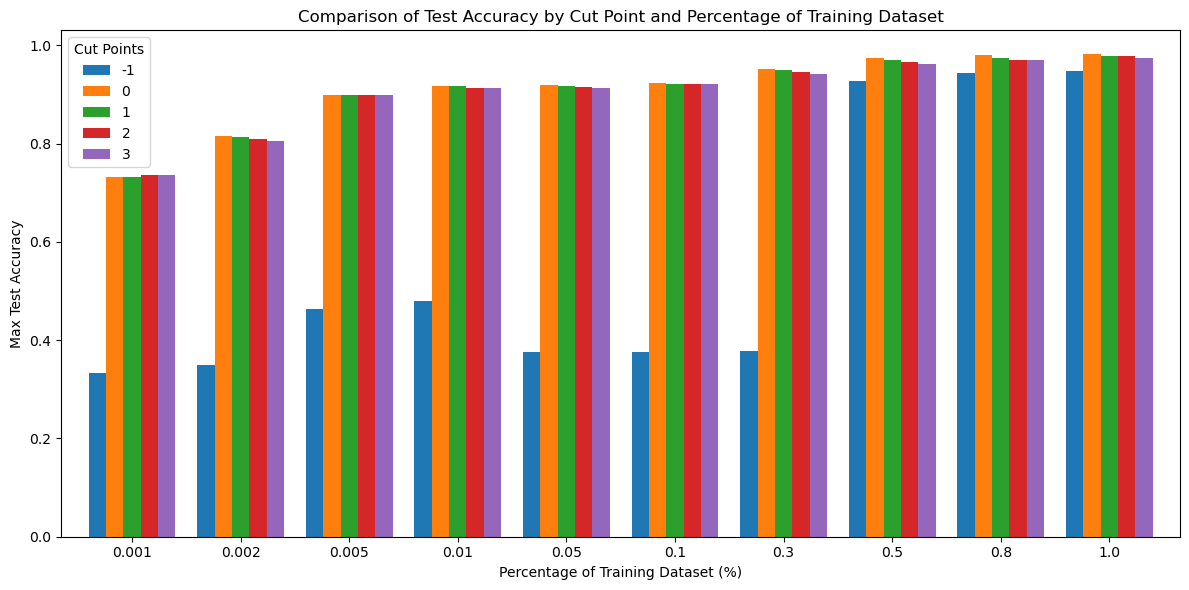

In [20]:
# Create a bar graph for comparing the test accuracies of different cut points at each percentage level.

# Find the mean test accuracy for each cut point at each percentage level.
mean_accuracies = df.groupby(['Cut Point', 'Percentage']).mean()['Max Test Accuracy'].unstack(0)

# Plotting
mean_accuracies.plot(kind='bar', figsize=(12, 6), width=0.8)

plt.title('Comparison of Test Accuracy by Cut Point and Percentage of Training Dataset')
plt.xlabel('Percentage of Training Dataset (%)')
plt.ylabel('Max Test Accuracy')
plt.xticks(rotation=0)  # Rotate x-axis labels to show them horizontally.
plt.legend(title='Cut Points')
plt.tight_layout()
plt.show()


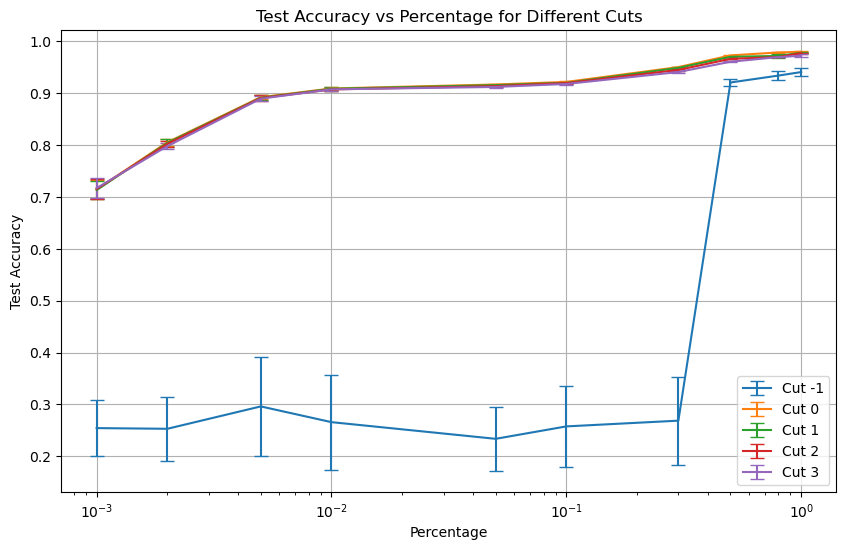

In [21]:
# Calculate mean and standard deviation for test accuracies
# Assuming that the provided data has a pattern where every three tuples belong to the same
# percentage and cut point but different trials
df['Mean Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('mean')
df['Std Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('std')

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over each unique cut point
for cut_point in df['Cut Point'].unique():
    cut_df = df[df['Cut Point'] == cut_point]

    # Calculate mean and standard deviation for each percentage
    means = cut_df.groupby('Percentage')['Mean Test Accuracy'].mean()
    stds = cut_df.groupby('Percentage')['Std Test Accuracy'].mean()

    # Plot with error bars for uncertainty
    plt.errorbar(means.index, means, yerr=stds, capsize=5, label=f'Cut {cut_point}')
    #plt.errorbar(means.index, means, capsize=5, label=f'Cut {cut_point}')


plt.xlabel('Percentage')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Percentage for Different Cuts')
plt.legend()
#x log
plt.xscale('log')
plt.grid(True)
plt.show()

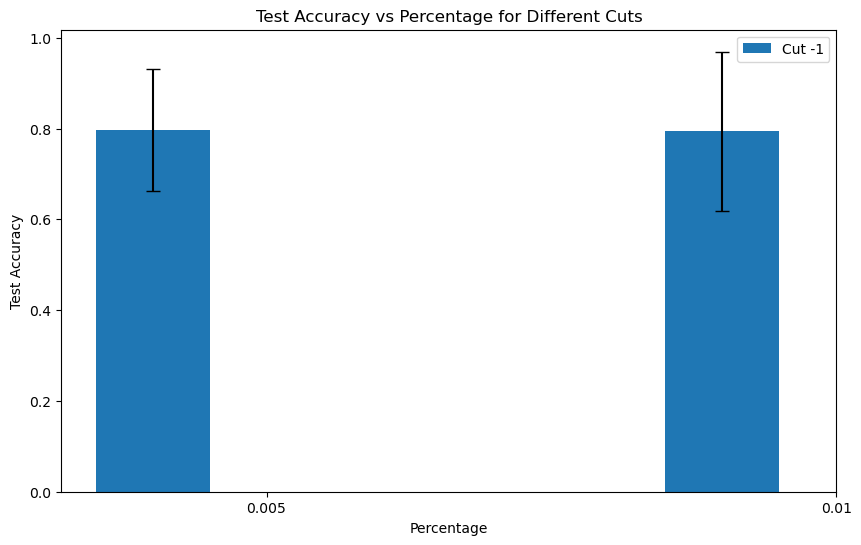

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Group by 'Percentage' and 'Cut Point' and calculate mean and std of 'Test Accuracy'
grouped = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].agg(['mean', 'std']).reset_index()

# Set figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Colors for each 'Cut Point'
#colors = ['blue', 'green', 'red', 'cyan']

# Set positions of the bars
positions = np.arange(len(grouped['Percentage'].unique()))

# Width of each bar
bar_width = 0.2

# Loop through each 'Cut Point'
for i, cut in enumerate(grouped['Cut Point'].unique()):
    # Filter the data for the current 'Cut Point'
    cut_data = grouped[grouped['Cut Point'] == cut]
    
    # Calculate positions for the current 'Cut Point'
    cut_positions = positions + (i * bar_width)
    
    # Plot bars
    #ax.bar(cut_positions, cut_data['mean'], width=bar_width, color=colors[i], yerr=cut_data['std'], capsize=5, label=f'Cut {cut}')
    ax.bar(cut_positions, cut_data['mean'], width=bar_width, yerr=cut_data['std'], capsize=5, label=f'Cut {cut}')


# Set x-ticks positions and labels
ax.set_xticks(positions + bar_width)
ax.set_xticklabels(grouped['Percentage'].unique())

# Set labels and title
ax.set_xlabel('Percentage')
ax.set_ylabel('Test Accuracy')
ax.set_title('Test Accuracy vs Percentage for Different Cuts')

# Display legend
ax.legend()

# Show plot
plt.show()


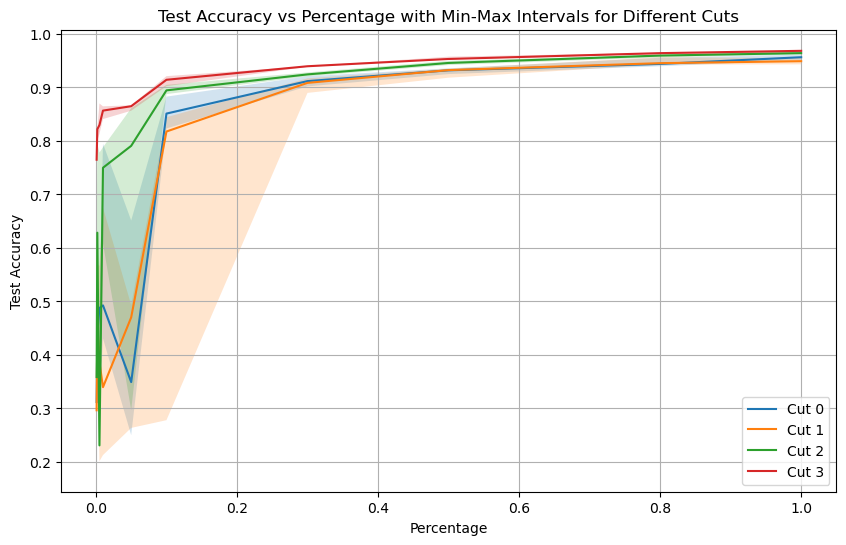

In [26]:
# Adjusting the code to use minimum, maximum, and median values instead of mean and standard deviation

# Calculate median, min, and max for test accuracies
df['Median Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('median')
df['Min Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('min')
df['Max Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('max')

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over each unique cut point
for cut_point in df['Cut Point'].unique():
    cut_df = df[df['Cut Point'] == cut_point]

    # Calculate median, min, and max for each percentage
    medians = cut_df.groupby('Percentage')['Median Test Accuracy'].median()
    mins = cut_df.groupby('Percentage')['Min Test Accuracy'].min()
    maxs = cut_df.groupby('Percentage')['Max Test Accuracy'].max()

    # Plot median values
    plt.plot(medians.index, medians, label=f'Cut {cut_point}')

    # Plot intervals between min and max as shaded areas
    plt.fill_between(medians.index, mins, maxs, alpha=0.2)

plt.xlabel('Percentage')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Percentage with Min-Max Intervals for Different Cuts')
plt.legend()
plt.grid(True)
plt.show()


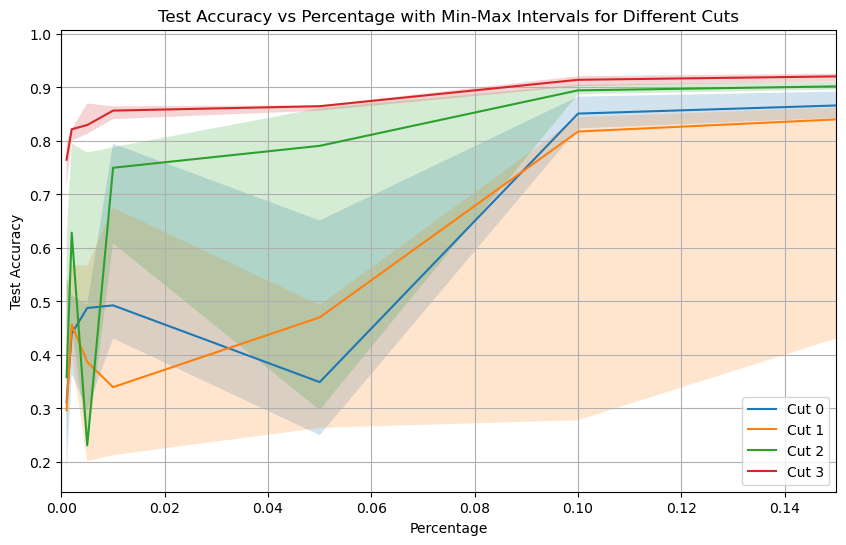

In [27]:
# Adjusting the code to use minimum, maximum, and median values instead of mean and standard deviation

# Calculate median, min, and max for test accuracies
df['Median Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('median')
df['Min Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('min')
df['Max Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('max')

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over each unique cut point
for cut_point in df['Cut Point'].unique():
    cut_df = df[df['Cut Point'] == cut_point]

    # Calculate median, min, and max for each percentage
    medians = cut_df.groupby('Percentage')['Median Test Accuracy'].median()
    mins = cut_df.groupby('Percentage')['Min Test Accuracy'].min()
    maxs = cut_df.groupby('Percentage')['Max Test Accuracy'].max()

    # Plot median values
    plt.plot(medians.index, medians, label=f'Cut {cut_point}')

    # Plot intervals between min and max as shaded areas
    plt.fill_between(medians.index, mins, maxs, alpha=0.2)

plt.xlabel('Percentage')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Percentage with Min-Max Intervals for Different Cuts')
plt.legend()
plt.grid(True)
#plt.xscale('log')
#x limit to 0.3
plt.xlim(0, 0.15)
plt.show()


In [62]:
conv_indices = [0, 2, 4]
idx = 2
for idx in conv_indices[:idx]:
    print(idx)

print('##################')

for idx in conv_indices[idx:]:
    print(idx)

0
2
##################
4


### Split the dictionaries into baseline and fine-tuning ones: only run when necessary

In [23]:
import json
import pandas as pd

with open('results_jsons/merged_freeze_no_reinit_no_pool_lr_0.0001.json', 'r') as f:
    data_dicts = json.load(f)

import torch.nn as nn
import copy, json
percentages = [0.001, 0.002, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 0.8, 1]

# cuts=0 means: end-to-end model if we are reinitializing
cuts = [0,1,2,3]
seed_set = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # currently not being used
batch_size = 4096
params = {
      'depth': 3,
      'width': 10, # num channels for CNN
      'hidden_dim_lin': 128,
      'activation_function': nn.ReLU,
      'kernel_size': 5,
      'lr_pretrain': 0.001,   
      'lr_fine_tune': 0.0001,  # CHANGE: if no layer-wise lr
      'lr_fine_tune_reinit': 0.001,         # CHANGE: if no layer-wise lr
      'lr_fine_tune_no_reinit': 0.0001,     # CHANGE: if layer-wise lr
      'num_train': 40,
      'early_stop_patience': 6,
      'save_best': False,
      'save_checkpoints': False,
      'is_cnn': True,
      'is_debug': False,
      'classification_report_flag': False,
      'percentages':percentages,
      'batch_size':batch_size,
      'seed_set':seed_set,
      'use_pooling': False,   # CHANGE
      'freeze': True,         # CHANGE: freeze the conv layers before the cut
      'reinit': False,         # CHANGE: reinit the conv lyers only after the cut
      'reinit_both_dense': True   # CHANGE: True for reinitialize both dense layers, False for reinit only the last dense layer
    }
params_tmp = copy.deepcopy(params)
params_tmp["activation_function"] = str(params_tmp["activation_function"])

baselines = [params_tmp]
results = [params_tmp]
for row in data_dicts:
    if row["sampled_cut_point"] == -1:
        baselines.append(row)
    else:
        results.append(row)

with open(f'results_jsons/baselines_freeze_{params["freeze"]}_pool_{params["use_pooling"]}_lr_{params["lr_fine_tune"]}.json', 'w') as f:
    json.dump(baselines, f)
with open(f'results_jsons/results_freeze_{params["freeze"]}_reinit_{params["reinit"]}_pool_{params["use_pooling"]}_lr_{params["lr_fine_tune"]}.json', 'w') as f:
    json.dump(results, f)